In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
import copy

In [144]:
import numpy as np
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [145]:
df.shape

(506, 14)

In [146]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [147]:
df.dropna(inplace = True)

In [148]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [149]:
for col in df.columns:
    df[col] = (df[col] - df[col].min())/(df[col].max() - df[col].min())

In [150]:
df.shape

(394, 14)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    float64
 9   TAX      394 non-null    float64
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(14)
memory usage: 46.2 KB


In [152]:
corr = df.corr()
corr.shape

(14, 14)

<AxesSubplot:>

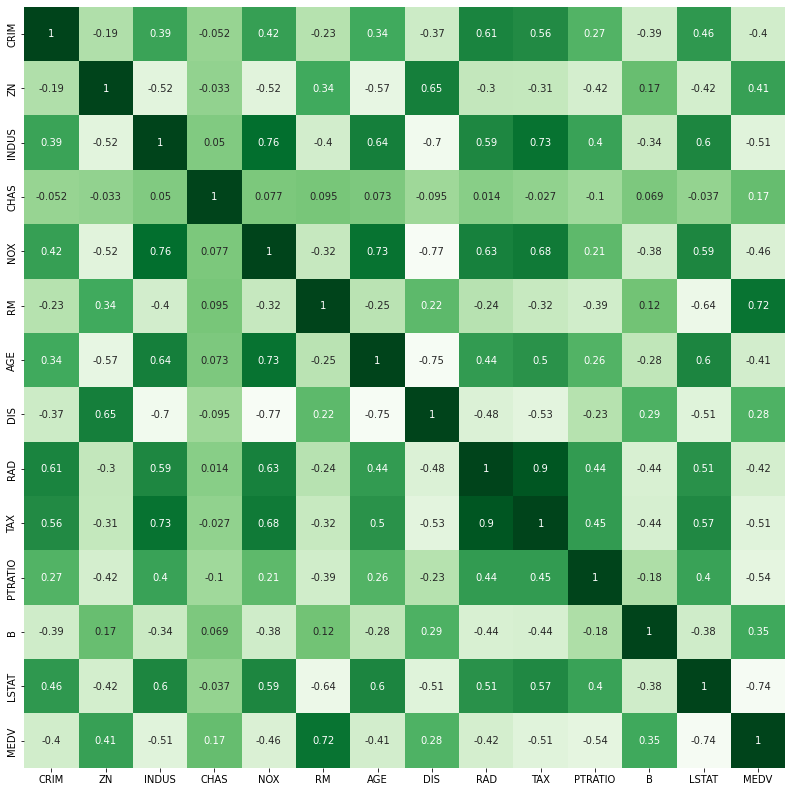

In [153]:
plt.figure(figsize=(14,14))
sns.heatmap(corr,cbar=False, square= True,  annot=True, cmap='Greens')

In [154]:
X = df.iloc[:,0:13]
y = df.iloc[:,-1]

In [155]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.309129,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.165975,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.165975,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989678,0.063466
3,0.000293,0.00,0.063050,0.0,0.143154,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994243,0.033389
5,0.000264,0.00,0.063050,0.0,0.143154,0.549722,0.574665,0.448545,0.086957,0.066794,0.648936,0.992950,0.096026


In [156]:
y = df["MEDV"]

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)
X_train = X_train.T
#print("X_train.shape",X_train.shape)
X_test = X_test.T
#print("X_test.shape",X_test.shape)
#print("y_train.shape",y_train.shape)
y_train = (y_train.values.reshape(-1, 1)).T
#print(y_train)
#print("y_train.shape",y_train.shape)
#y_test = (y_test.values.reshape(-1, 1)).T
#print("y_test.shape",y_test.shape)

In [158]:
def sigmoid(z):
    s = 1/(1 + np.exp(-z))
    return s

In [87]:
#print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

In [159]:
def ini(dim):
    w = np.zeros((dim, 1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [165]:
def propogate(w,b,X,Y):
    m = X.shape[1]
    #print("MMM",m)
    A = sigmoid(np.dot(w.T, X) + b)
    #print("A=",A)
    #print("Y=",Y)
    #print("Y shape=",Y.shape)
    cost = -1/m * (np.sum(Y*np.log(A) + (1-Y)*np.log(1-A)))
    
    dw = 1/m * (np.dot(X, ((A-Y).T)))
    db = 1/m * (np.sum(A - Y))
    
    cost = np.squeeze(np.array(cost))
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [170]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    print("w shape while optimization=",w.shape)
    costs = []
    #print_cost = True
    for i in range(num_iterations):
        grads, cost = propogate(w, b, X, Y)
        
        dw = grads["dw"]
        db =grads["db"]
        #print("w",w.T)
        w = w - (learning_rate * dw)
        #print("b",b)
        b = b - (learning_rate * db)
        #print(i)
        if i % 100 == 0:
            costs.append(cost)
        if print_cost:
            print ("Cost after iteration %i: %f" %(i,cost))
            #print("dw",grads["dw"])
            #print("db",grads["db"])
                
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
        
    return params, grads, costs

In [162]:
def predict(w, b, X):
    m = X.shape[1]
    print(m)
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0][i] > 0.5 else 0
    #Y_prediction = (A >= 0.5) * 1.0
    
    #assert(Y_prediction.shape == (1, m))
        
    return Y_prediction

In [163]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate=0.5, print_cost=False):
    w, b = ini(X_train.shape[0])
    
    params, grads, costs = optimize(w, b , X_train, Y_train, num_iterations, learning_rate, print_cost = False)
    w = params["w"]
    b = params["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [179]:
print(y_train.shape)
logistic_regression_model = model(X_train, y_train, X_test, y_test, num_iterations=20000, learning_rate=0.05, print_cost=True)
#print("Costs",logistic_regression_model["costs"])

(1, 275)
w shape while optimization= (13, 1)
119
275
train accuracy: 68.52040404040403 %
test accuracy: 67.47899159663865 %
